In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/pca/datasets_308180_627001_Wine.csv'
df = pd.read_csv(url)

#https://www.kaggle.com/sadeghjalalian/wine-customer-segmentation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

# 1 - 14
**ข้อ 1**

In [4]:
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,3
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,1


In [28]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [ ]:
df.tail(10)

**ข้อ 3 - 4**
ไม่มีข้อมูลสูญหาย

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**ข้อ 5**

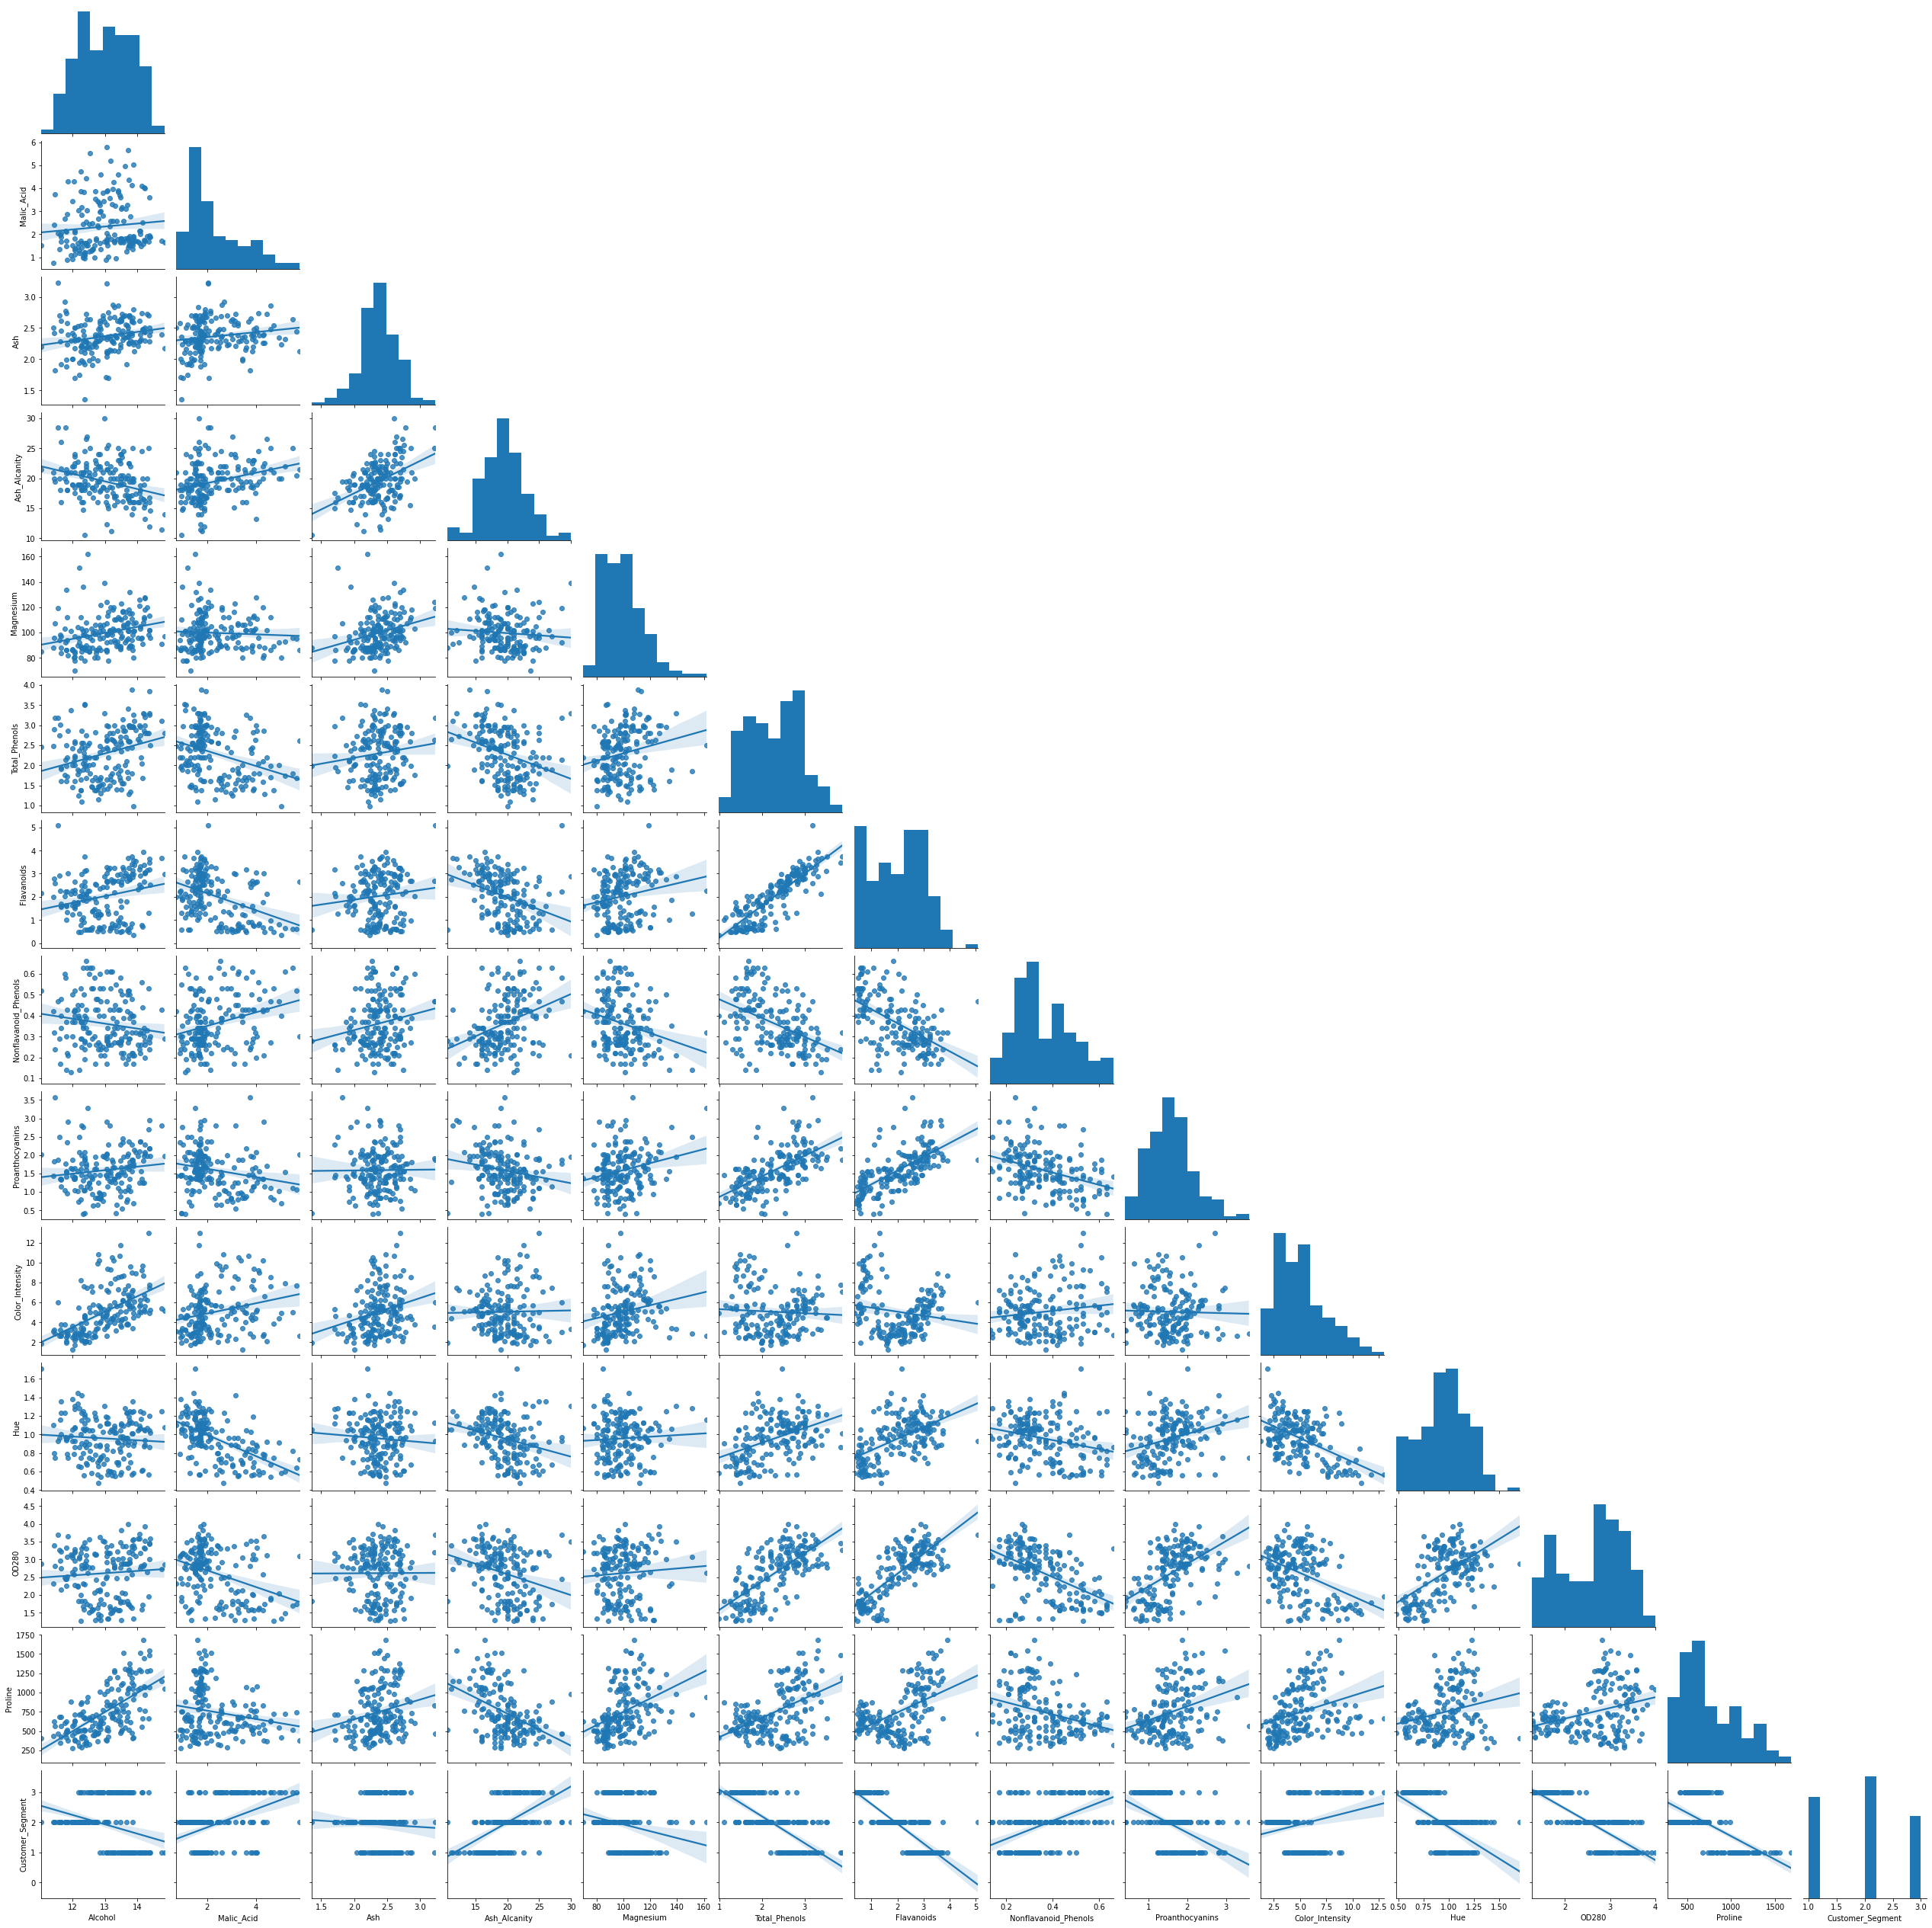

In [7]:
sns.pairplot(df,kind='reg',corner=True)

**ข้อ 7**

In [20]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


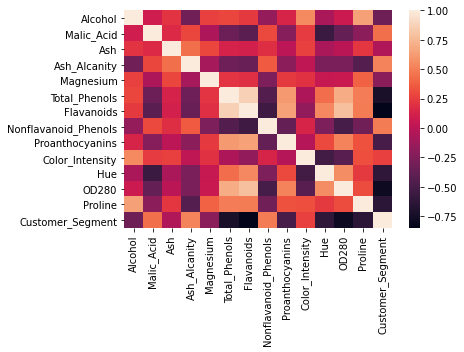

In [38]:
sns.heatmap(df.corr())

**ข้อ 8 - 10**

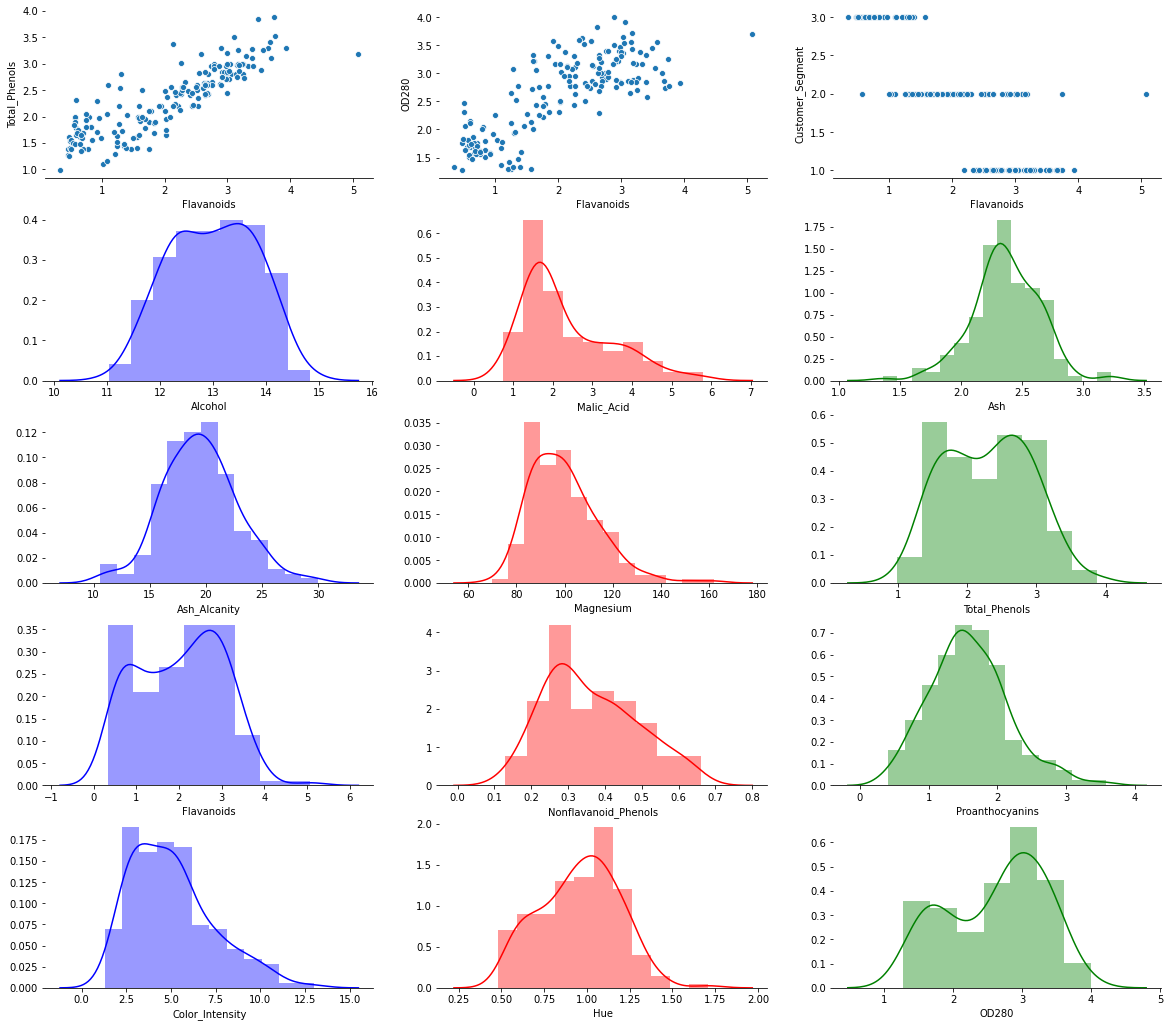

In [41]:
f, axes = plt.subplots(5, 3, figsize=(20, 18), sharex=False)
sns.despine(left=True)

sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,5],data=df, ax=axes[0, 0])
sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,11],data=df, ax=axes[0, 1])
sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,13],data=df, ax=axes[0, 2])

sns.distplot(df.iloc[:,0], kde=True, color="b", ax=axes[1,0]) 
sns.distplot(df.iloc[:,1], kde=True, color="r", ax=axes[1,1])
sns.distplot(df.iloc[:,2], kde=True, color="g", ax=axes[1,2])

sns.distplot(df.iloc[:,3], kde=True, color="b", ax=axes[2,0]) 
sns.distplot(df.iloc[:,4], kde=True, color="r", ax=axes[2,1])
sns.distplot(df.iloc[:,5], kde=True, color="g", ax=axes[2,2])

sns.distplot(df.iloc[:,6], kde=True, color="b", ax=axes[3,0]) 
sns.distplot(df.iloc[:,7], kde=True, color="r", ax=axes[3,1])
sns.distplot(df.iloc[:,8], kde=True, color="g", ax=axes[3,2])

sns.distplot(df.iloc[:,9], kde=True, color="b", ax=axes[4,0]) 
sns.distplot(df.iloc[:,10], kde=True, color="r", ax=axes[4,1])
sns.distplot(df.iloc[:,11], kde=True, color="g", ax=axes[4,2])

#sns.countplot(df.iloc[:,2], ax=axes[1, 0])
#sns.countplot(df.iloc[:,3], ax=axes[1, 1])
#sns.scatterplot(x=df.iloc[:,6],y=df.iloc[:,10],data=df, ax=axes[1, 2])


[link text](https://python.astrotech.io/numerical-analysis/data-visualization/plotly.html)

[link text](https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners)

[link text](https://www.geeksforgeeks.org/box-plot-in-plotly-using-graph_objects-class/ [link text](https://))

**ข้อ 11 - 12** ค่า Outlier และจำนวนข้อมูล มีจำนวนน้อยและขาดความเข้าใจในค่าดังกล่าว ดังนั้นจึงเก็บค่า Outlier ไว้เพื่อประโยชน์ในการสร้าง model

In [16]:
import plotly.graph_objects as px 
#x = ['A', 'B', 'C', 'D'] 
  
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,1],name=df.columns[1])) 
plot.add_trace(px.Box(y=df.iloc[:,2],name=df.columns[2]))
plot.add_trace(px.Box(y=df.iloc[:,5],name=df.columns[5])) 
plot.add_trace(px.Box(y=df.iloc[:,6],name=df.columns[6]))
plot.add_trace(px.Box(y=df.iloc[:,8],name=df.columns[8]))
plot.add_trace(px.Box(y=df.iloc[:,9],name=df.columns[9]))
  
plot.show()

In [17]:
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,0],name=df.columns[0])) 
plot.add_trace(px.Box(y=df.iloc[:,3],name=df.columns[3]))

  
plot.show()

In [21]:
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,4],name=df.columns[4])) 
  
plot.show()

In [22]:
plot = px.Figure() 
  
plot.add_trace(px.Box(y=df.iloc[:,12],name=df.columns[12])) 

plot.show()

**ข้อ 13 - 14**

In [ ]:
label_col = 13 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code 

X = df.drop(df.columns[label_col],axis=1)
y = df.iloc[:,[label_col]]

X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size = 0.7,random_state=100)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#X_train = pd.DataFrame(X_train,columns=df.iloc[:,0:13].columns)
#X_test = pd.DataFrame(X_test,columns=df.iloc[:,0:13].columns)

# ข้อ 15-17

**Base Line 1 : Support Vector Regression**

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = svc.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 20]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9814814814814815,
 0.9833229101521784,
 0.9833333333333334,
 0.9841269841269842)

In [ ]:
rows = ['svc']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9814814814814815,0.9833229101521784,0.9833333333333334,0.9841269841269842]]

df_compare = pd.DataFrame(data=values,columns=columns,index=rows)

**Base Line 2 : Random Forrest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = rf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(1.0, 1.0, 1.0, 1.0)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(1.0, 1.0, 1.0, 1.0)

In [ ]:
rows = ['rf']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[1.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 18-19

**ทำ hyperparameter tuning ด้วย GridSearchCV กับ Support Vector Regression**

In [ ]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search = GridSearchCV(svc,param_com)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'C': 100, 'gamma': 0.001}

In [ ]:
grid_search.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = grid_search.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 18,  1],
       [ 1,  1, 19]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9444444444444444,
 0.9465716435748749,
 0.9435672514619883,
 0.9507101086048454)

In [ ]:
rows = ['svc_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9465716435748749,0.9435672514619883,0.9507101086048454]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**ทำ hyperparameter tuning ด้วย GridSearchCV กับ Random Forrest**

In [ ]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50,100]}
grid_search1 = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [ ]:
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selectio

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_search1.best_params_

{'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 100}

In [ ]:
grid_search1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = grid_search1.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(1.0, 1.0, 1.0, 1.0)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(1.0, 1.0, 1.0, 1.0)

In [ ]:
rows = ['rf_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[1.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 20-25

**PCA**

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

In [ ]:
df_comp

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.194940,-0.207784,0.042712,-0.245955,0.148467,0.404945,0.429701,-0.318754,0.318874,-0.022782,0.256415,0.353591,0.302094
1,-0.442156,-0.235907,-0.212748,0.139308,-0.342205,-0.001775,0.069651,-0.089936,0.036019,-0.530714,0.287154,0.241397,-0.361172


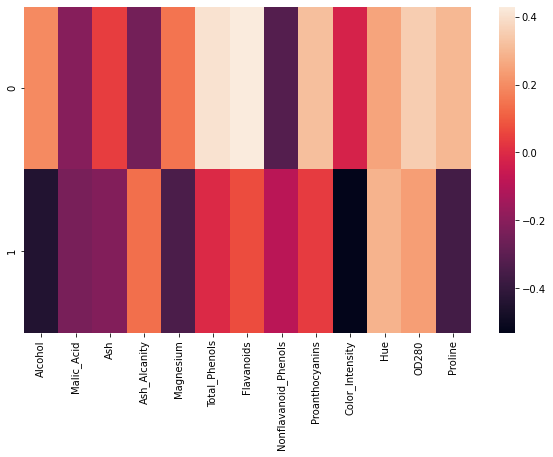

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_comp)

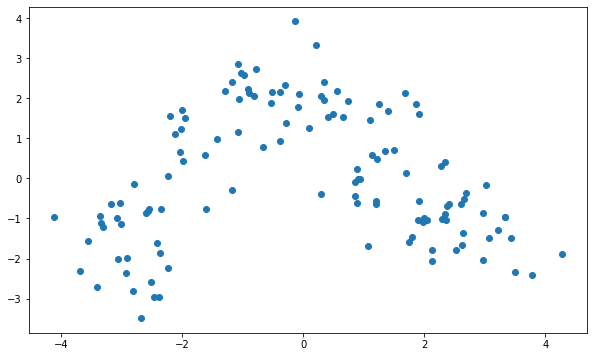

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])

**SVC with PCA**

In [ ]:
svc_pca = SVC()
svc_pca.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = svc_pca.predict(X_test_pca)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 2, 17,  0],
       [ 0,  0, 21]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9629629629629629,
 0.9592592592592593,
 0.9583333333333334,
 0.9649122807017544)

In [ ]:
rows = ['svc_pca']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9592592592592593,0.9583333333333334,0.9649122807017544]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**RF with PCA**


In [ ]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = rf_pca.predict(X_test_pca)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 2, 17,  0],
       [ 0,  1, 20]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9444444444444444,
 0.9426206694499378,
 0.9398148148148149,
 0.9490392648287385)

In [ ]:
rows = ['rf_pca']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9259259259259259,0.9259259259259259,0.9259259259259259,0.9259259259259259,0.9444444444444444,0.9426206694499378,0.9398148148148149,0.9490392648287385]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 26-27

**hyperparameter tuning ด้วย GridSearchCV กรณี SVC with PCA**

In [ ]:
param_com = {'C':[100,1000,10000],'gamma':[0.00001,0.0001,0.001]}
grid_search_svc_pca = GridSearchCV(svc,param_com)

In [ ]:
grid_search_svc_pca.fit(X_train_pca,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search_svc_pca.best_params_

{'C': 10000, 'gamma': 0.001}

In [ ]:
grid_search_svc_pca.best_estimator_

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict = grid_search_svc_pca.predict(X_test_pca)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 0,  1, 20]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9629629629629629, 0.962831806176501, 0.960233918128655, 0.9665831244778612)

In [ ]:
rows = ['svc_pca_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9629629629629629,0.9629629629629629, 0.962831806176501, 0.960233918128655, 0.9665831244778612]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

**hyperparameter tuning ด้วย GridSearchCV กรณี RF with PCA**

In [ ]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50,100]}
grid_search_rf_pca = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [ ]:
grid_search_rf_pca.fit(X_train_pca,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selectio

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_search_rf_pca.best_params_

{'max_depth': 32, 'min_samples_leaf': 1, 'n_estimators': 10}

In [ ]:
grid_search_rf_pca.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = grid_search_rf_pca.predict(X_test_pca)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 0,  2, 19]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444)

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'macro'),precision_score(y_test,y_predict,average = 'macro'),recall_score(y_test,y_predict,average = 'macro')

(0.9444444444444444,
 0.9461980548187445,
 0.9444444444444445,
 0.9507101086048454)

In [ ]:
rows = ['rf_pca_hyp']
columns = ['acc_mic','f1_mic','ps_mic','rs_mic','acc_mac','f1_mac','ps_mac','rs_mac']
values = [[0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9444444444444444,0.9426206694499378,0.9398148148148149,0.9490392648287385]]

df_compare = pd.concat([df_compare,pd.DataFrame(data=values,columns=columns,index=rows)])

# ข้อ 29-32

In [ ]:
df_compare

,acc_mic,f1_mic,ps_mic,rs_mic,acc_mac,f1_mac,ps_mac,rs_mac
svc,0.981481,0.981481,0.981481,0.981481,0.981481,0.983323,0.983333,0.984127
rf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
svc_hyp,0.944444,0.944444,0.944444,0.944444,0.944444,0.946572,0.943567,0.950710
rf_hyp,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
svc_pca,0.962963,0.962963,0.962963,0.962963,0.962963,0.959259,0.958333,0.964912
rf_pca,0.925926,0.925926,0.925926,0.925926,0.944444,0.942621,0.939815,0.949039
svc_pca_hyp,0.962963,0.962963,0.962963,0.962963,0.962963,0.962832,0.960234,0.966583
rf_pca_hyp,0.944444,0.944444,0.944444,0.944444,0.944444,0.942621,0.939815,0.949039


In [ ]:
import plotly.graph_objects as go

In [ ]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,0]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,4])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='ACC')
fig.show()

In [ ]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,1]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,5])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='F1')
fig.show()

In [ ]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,2]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,6])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='PS')
fig.show()

In [ ]:
model=df_compare.index

fig = go.Figure(data=[
    go.Bar(name='micro', x=model, y=df_compare.iloc[:,3]),
    go.Bar(name='macro', x=model, y=df_compare.iloc[:,7])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='RS')
fig.show()